## Q1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('./East_std.csv')
df

,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [24]:
no_of_clusters = np.arange(1, 11)

In [25]:
wss = []

In [26]:
for k in no_of_clusters:
    model = KMeans(n_clusters=k, random_state=12345)
    model.fit(df)
    wss.append(model.inertia_)

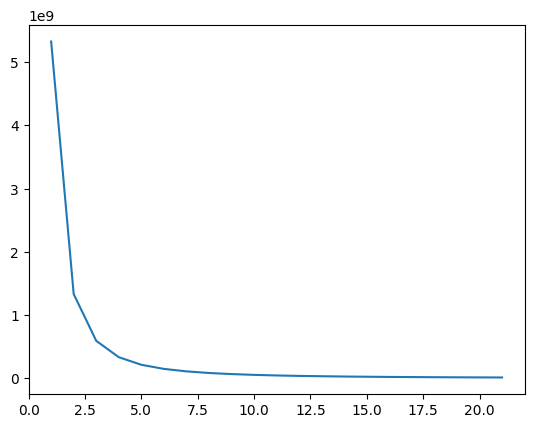

In [12]:
plt.plot(no_of_clusters, wss, label="WSS")

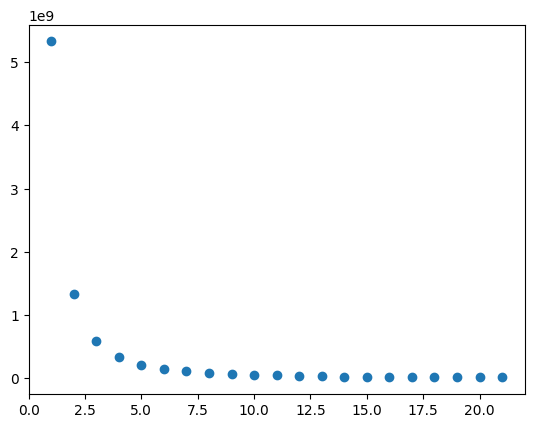

In [13]:
plt.scatter(no_of_clusters, wss)

ValueError: Unrecognized marker style 's v'

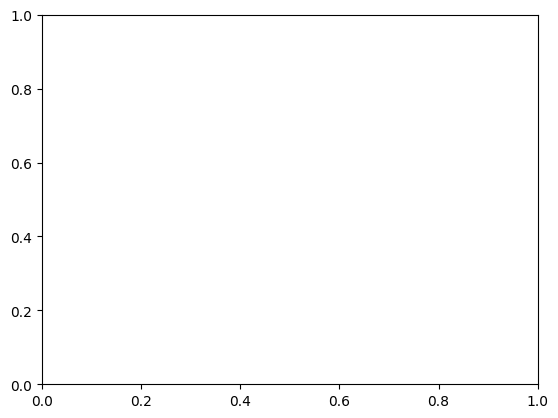

In [14]:
plt.scatter(no_of_clusters[4], wss[4], color='r', label="optimal K", marker="s v")

ValueError: Unrecognized marker style 's  v'

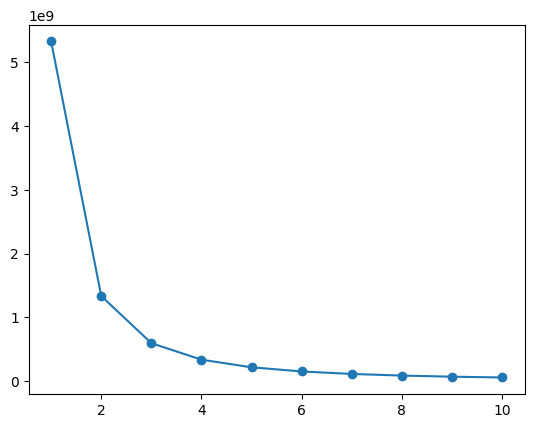

In [27]:
plt.plot(no_of_clusters, wss, label="WSS")
plt.scatter(no_of_clusters, wss)
plt.scatter(no_of_clusters[4], wss[4],
            color="red", label="Optimal K", marker="s  v")
plt.xlabel("No of clusters")
plt.ylabel("East Standard")
plt.title("Elbow Method Visualization")
plt.legend()
plt.show()

In [28]:
model_KMeans = KMeans(n_clusters=2, random_state=12345)
model.fit(df)

KMeans(n_clusters=10, random_state=12345)

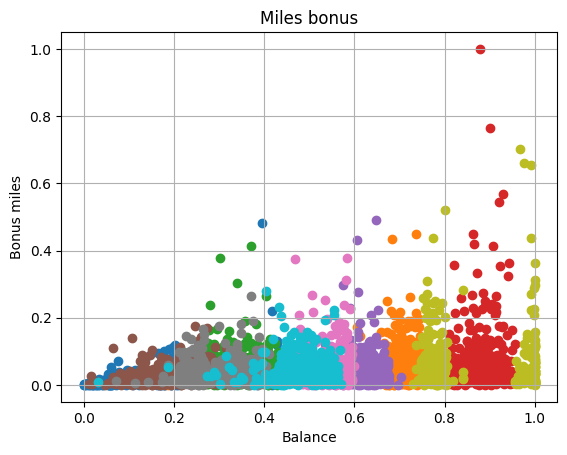

In [37]:
colors = ['red', 'green', 'blue', 'brown', 'yellow']
plt.xlabel("Balance")
plt.ylabel("Bonus miles")
plt.title("Miles bonus")
plt.grid()

for index in range(len(model.cluster_centers_)):
    plt.scatter(
        df['Days_since_enroll'][model.labels_ == index],
        df['Balance'][model.labels_ == index]
        )
    
    # plt.scatter(
    #     model.cluster_centers_[index][0],
    #     model.cluster_centers_[index][1],
    #     color="black", marker="s")